In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
prod_df = pd.read_excel("./data/Prod_rev1.xlsx")
prod_df.head()

,Date,M/C,Ton,Status,ItemId,ItemName,Material Code,Material Name,M/B Code,M/B Name,...,Part TestMold,DownTime NEW,NG case,Shief,Zone,Unnamed: 200,Part NG ( kg ),Part Adjust ( kg ),Pugre ( kg ),Total Defect
0,2023-04-01,I-099,130 Ton(T),STD,4-BOSCH-1928405895-J09-EX-INJ,1928405895 SECONDARY LOCKING (EX),1-BOSCH-PA66-66 H2 G35-EX,PA66 LATAMID 66 H2 G35 SIGNAL VIOLET (EX),NaN,NaN,...,0.0,NaN,NaN,N,6,N6,0.0,0.0,0.0,429.0
1,2023-04-01,I-099,130 Ton(T),STD,4-BOSCH-1928405895-J09-EX-INJ,1928405895 SECONDARY LOCKING (EX),1-BOSCH-PA66-66 H2 G35-EX,PA66 LATAMID 66 H2 G35 SIGNAL VIOLET (EX),NaN,NaN,...,0.0,NaN,NaN,D,6,D6,0.0,0.0,0.0,254.0
2,2023-04-03,I-099,130 Ton(T),STD,4-BOSCH-1928405895-J09-EX-INJ,1928405895 SECONDARY LOCKING (EX),1-BOSCH-PA66-66 H2 G35-EX,PA66 LATAMID 66 H2 G35 SIGNAL VIOLET (EX),NaN,NaN,...,0.0,NaN,NaN,D,6,D6,0.0,0.0,0.0,0.0
3,2023-04-03,I-099,130 Ton(T),STD,4-BOSCH-1928405895-J09-EX-INJ,1928405895 SECONDARY LOCKING (EX),1-BOSCH-PA66-66 H2 G35-EX,PA66 LATAMID 66 H2 G35 SIGNAL VIOLET (EX),NaN,NaN,...,0.0,NaN,NaN,N,6,N6,0.0,0.0,0.0,402.0
4,2023-04-04,I-099,130 Ton(T),STD,4-BOSCH-1928405895-J09-EX-INJ,1928405895 SECONDARY LOCKING (EX),1-BOSCH-PA66-66 H2 G35-EX,PA66 LATAMID 66 H2 G35 SIGNAL VIOLET (EX),NaN,NaN,...,0.0,NaN,NaN,D,6,D6,0.0,0.0,0.0,538.0


In [18]:
for col in prod_df.columns:
    try:
        new_col = prod_df[col].replace("-", None).astype(float)
        prod_df[col] = new_col
    except:
        print(f"'{col}' is not convertible to Float")

'Date' is not convertible to Float
'M/C' is not convertible to Float
'Ton' is not convertible to Float
'Status' is not convertible to Float
'ItemId' is not convertible to Float
'ItemName' is not convertible to Float
'Material Code' is not convertible to Float
'Material Name' is not convertible to Float
'M/B  Code' is not convertible to Float
'M/B  Name' is not convertible to Float
'Colour' is not convertible to Float
'Customer' is not convertible to Float
'Group Industry' is not convertible to Float
'Die  No' is not convertible to Float
'Shief' is not convertible to Float
'Unnamed: 200' is not convertible to Float


In [19]:
# Calculate planned and unplanned downtime by summing downtime of each category
prod_df['Planned stop time'] = prod_df['Over hual machine'] + prod_df['Over hual mold'] + prod_df['Process adjustment']
prod_df['Unplanned stop time'] = prod_df['Down mold'] + prod_df['Up mold'] + prod_df['Setup equipment'] + prod_df['Adjust setup'] + prod_df['Qc accepted time'] + prod_df['Robot problem'] + prod_df['Adjust mc'] + prod_df['Change filter'] + prod_df['Change insert'] + prod_df['Change mat'] + prod_df['Change Date'] + prod_df['Clean machine'] + prod_df['Clean mold'] + prod_df['Clean screw'] + prod_df['Hopper problem'] + prod_df['Jig problem'] + prod_df['M/C problem'] + prod_df['Mold problem'] + prod_df['Nozzle Leak'] + prod_df['Clogged Gauge'] + prod_df['Part attached mold '] + prod_df['Power failure '] + prod_df['Contaminated pellets'] + prod_df['Pellets do not drop'] + prod_df['Mold waiting '] + prod_df['Packing waiting'] + prod_df['Assembly part waiting '] + prod_df['Waiting for crane '] + prod_df['Mold mounting waiting'] + prod_df['Waiting to adjust work'] + prod_df['Water leak '] + prod_df['Pellet drying'] + prod_df['Gauge pluged '] + prod_df['Waiting for pellets '] + prod_df['Runner attached mold '] 

C:\Users\Neo\AppData\Local\Temp\ipykernel_1688\1396162521.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prod_df['Planned stop time'] = prod_df['Over hual machine'] + prod_df['Over hual mold'] + prod_df['Process adjustment']
C:\Users\Neo\AppData\Local\Temp\ipykernel_1688\1396162521.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prod_df['Unplanned stop time'] = prod_df['Down mold'] + prod_df['Up mold'] + prod_df['Setup equipment'] + prod_df['Adjust setup'] + prod_df['Qc accepted time'] + prod_df['Robot problem'] + prod_

In [20]:
# # Calculate planned and unplanned downtime by summing downtime of each category
# prod_df['Planned stop time'] = prod_df['Over hual machine'].replace("-", None, inplace=True).astype(float) + prod_df['Over hual mold'].replace("-", None).astype(float) + prod_df['Process adjustment'].replace("-", None).astype(float)
# prod_df['Unplanned stop time'] = prod_df['Down mold'].replace("-", None).astype(float) + prod_df['Up mold'].replace("-", None).astype(float) + prod_df['Setup equipment'].replace("-", None).astype(float) + prod_df['Adjust setup'].replace("-", None).astype(float) + prod_df['Qc accepted time'].replace("-", None).astype(float) + prod_df['Robot problem'].replace("-", None).astype(float) + prod_df['Adjust mc'].replace("-", None).astype(float) + prod_df['Change filter'].replace("-", None).astype(float) + prod_df['Change insert'].replace("-", None).astype(float) + prod_df['Change mat'].replace("-", None).astype(float) + prod_df['Change Date'].replace("-", None).astype(float) + prod_df['Clean machine'].replace("-", None).astype(float) + prod_df['Clean mold'].replace("-", None).astype(float) + prod_df['Clean screw'].replace("-", None).astype(float) + prod_df['Hopper problem'].replace("-", None).astype(float) + prod_df['Jig problem'].replace("-", None).astype(float) + prod_df['M/C problem'].replace("-", None).astype(float) + prod_df['Mold problem'].replace("-", None).astype(float) + prod_df['Nozzle Leak'].replace("-", None).astype(float) + prod_df['Clogged Gauge'].replace("-", None).astype(float) + prod_df['Part attached mold '].replace("-", None).astype(float) + prod_df['Power failure '].replace("-", None).astype(float) + prod_df['Contaminated pellets'].replace("-", None).astype(float) + prod_df['Pellets do not drop'].replace("-", None).astype(float) + prod_df['Mold waiting '].replace("-", None).astype(float) + prod_df['Packing waiting'].replace("-", None).astype(float) + prod_df['Assembly part waiting '].replace("-", None).astype(float) + prod_df['Waiting for crane '].replace("-", None).astype(float) + prod_df['Mold mounting waiting'].replace("-", None).astype(float) + prod_df['Waiting to adjust work'].replace("-", None).astype(float) + prod_df['Water leak '].replace("-", None).astype(float) + prod_df['Pellet drying'].replace("-", None).astype(float) + prod_df['Gauge pluged '].replace("-", None).astype(float) + prod_df['Waiting for pellets '].replace("-", None).astype(float) + prod_df['Runner attached mold '].replace("-", None).astype(float) 

In [21]:
prod_df.columns.tolist()

['Date',
 'M/C',
 'Ton',
 'Status',
 'ItemId',
 'ItemName',
 'Material Code',
 'Material Name',
 'M/B  Code',
 'M/B  Name',
 'Colour',
 'Customer',
 'Group Industry',
 'Die  No',
 'Cavity',
 'CycleTime  STD',
 'Cycle Time Act',
 '%  CycleTime',
 'Weight  STD',
 'Weight  Act',
 'R/W ( Short / g )',
 'Manpower',
 'Labour',
 'LabourHour',
 'TimeSheft',
 'DownTime',
 '% DownTime',
 'STD Change  Mould',
 'STD Chang Mould New',
 'Change mold  Actual',
 '% SetupTime',
 'STD QCaccepted',
 'Qc accepted time',
 'Adjust setup',
 'Down mold',
 'Set up time',
 'Setup equipment',
 'Up mold',
 'Adjust mc',
 'Change filter',
 'Change insert',
 'Change mat',
 'Change mold',
 'Change Date',
 'Clean machine',
 'Clean mold',
 'Clean screw',
 'Hopper problem',
 'Jig problem',
 'M/C problem',
 'Mold problem',
 'Nozzle Leak',
 'Other',
 'Over hual machine',
 'Over hual mold',
 'Recheck',
 'Rework',
 'Robot problem',
 'Runner attached mold ',
 'Stop m/c',
 'Test mold',
 'Clogged Gauge',
 'Emergency incident',

In [22]:
prod_df['TimeSheft']

0      720.0
1      530.0
2      720.0
3      720.0
4      720.0
       ...  
985    660.0
986    660.0
987     34.0
988    660.0
989    660.0
Name: TimeSheft, Length: 990, dtype: float64

In [41]:
def display_corr(df, col, threshold=0.2):
    corr = df.corr(numeric_only=True)[col]
    corr = corr[(corr <= -threshold) | (corr >= threshold)].sort_values(ascending=False)
    corr.plot.bar(figsize=(16, 4))
    plt.show()

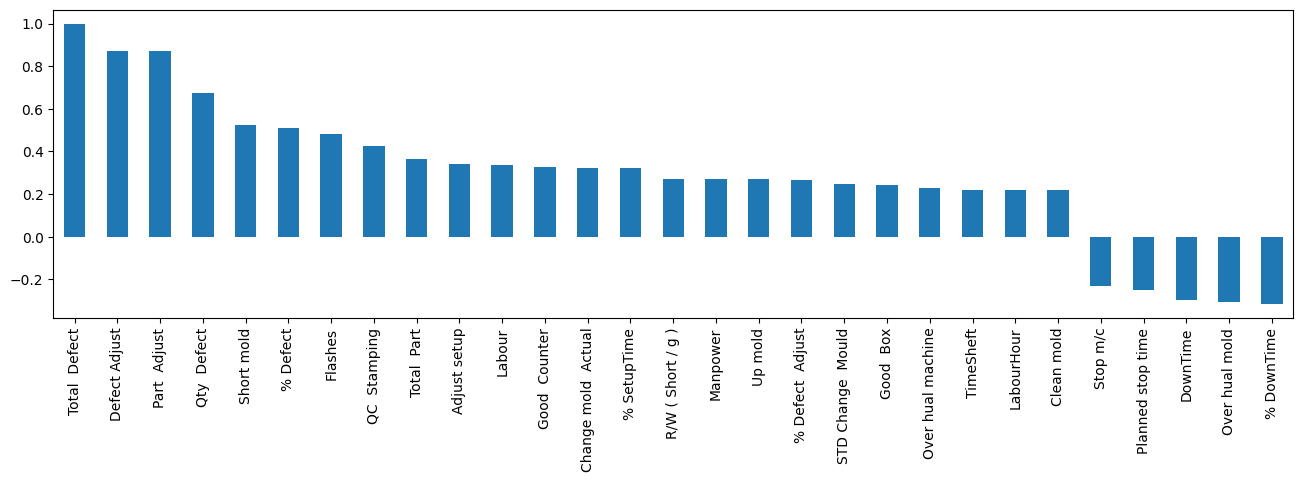

In [42]:
display_corr(prod_df, 'Total  Defect')

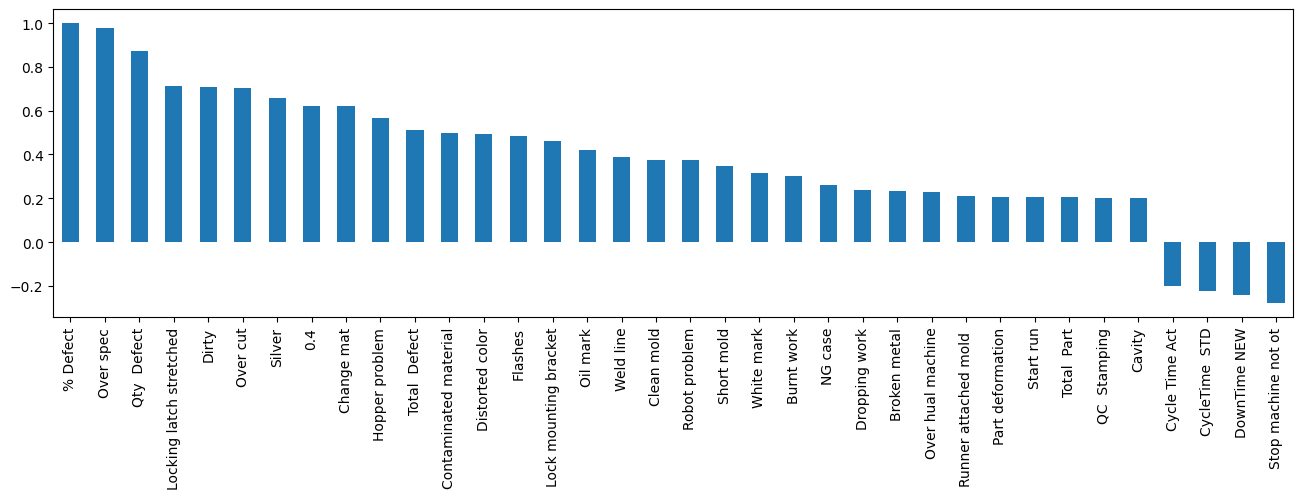

In [43]:
display_corr(prod_df, '% Defect')

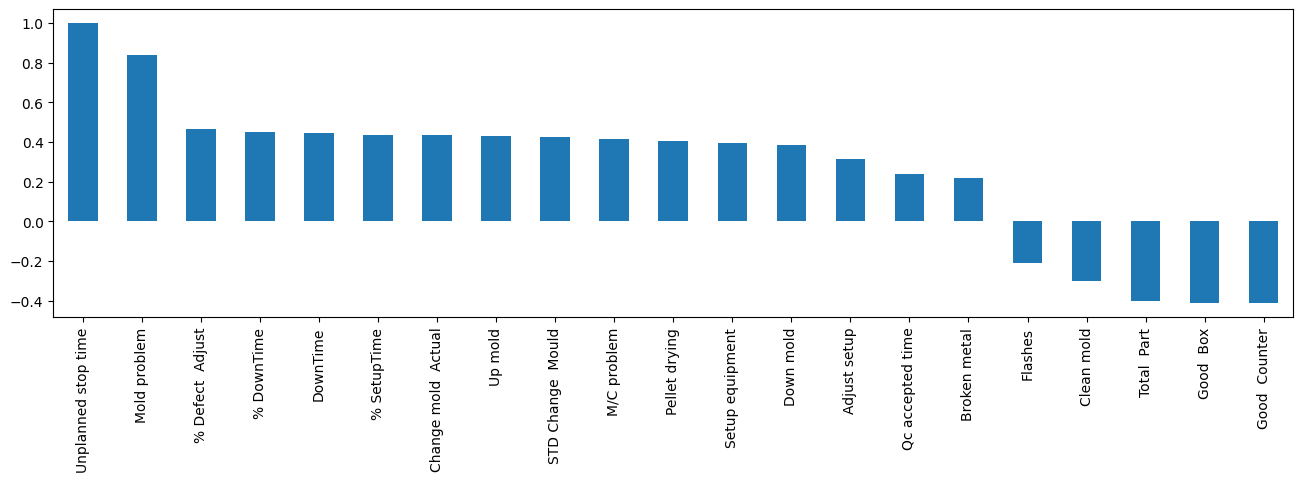

In [46]:
display_corr(prod_df, 'Unplanned stop time')

In [6]:
i99_df = prod_df[prod_df['M/C'] == 'I-99']
i102_df = prod_df[prod_df['M/C'] == 'I-102']

In [7]:
i99_downtime = i99_df[['Date', 'Planned stop time', 'Unplanned stop time']].groupby('Date').sum()
i102_downtime = i102_df[['Date', 'Planned stop time', 'Unplanned stop time']].groupby('Date').sum()
i99_downtime.head()

,Planned stop time,Unplanned stop time
Date,,
2023-04-01,0,37
2023-04-03,720,62
2023-04-04,0,17
2023-04-05,0,2
2023-04-17,0,176


### Time Value Imputations

In this project, we will apply the trend and seasonality decomposition method to impute missing dates in our dataset.

In [8]:
# Get dates that are not included in the dataset
date_range = pd.date_range(start=i99_downtime.index.min(), end=i99_downtime.index.max(), freq="D")
missing_dates = date_range[~date_range.isin(i99_downtime.index)]
print(missing_dates)

DatetimeIndex(['2023-04-02', '2023-04-06', '2023-04-07', '2023-04-08',
               '2023-04-09', '2023-04-10', '2023-04-11', '2023-04-12',
               '2023-04-13', '2023-04-14',
               ...
               '2024-01-20', '2024-01-21', '2024-01-26', '2024-01-27',
               '2024-01-28', '2024-01-29', '2024-01-30', '2024-01-31',
               '2024-02-01', '2024-02-02'],
              dtype='datetime64[ns]', length=181, freq=None)


In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose time-series data into trends and seasonalities
planned_result = seasonal_decompose(i99_downtime['Planned stop time'], model="additive", period=12, extrapolate_trend='freq')
unplanned_result = seasonal_decompose(i99_downtime['Unplanned stop time'], model="additive", period=12, extrapolate_trend='freq')

In [10]:
# Fill NaN trends using forward-filling method
planned_trend = planned_result.trend.reindex(date_range)
unplanned_trend = unplanned_result.trend.reindex(date_range)
planned_trend_filled = planned_trend.ffill()
unplanned_trend_filled = unplanned_trend.ffill()

In [11]:
# Fill NaN seasonalities using forward-filling method
planned_seasonal = planned_result.seasonal.reindex(date_range)
unplanned_seasonal = unplanned_result.seasonal.reindex(date_range)
planned_seasonal_filled = planned_seasonal.ffill()
unplanned_seasonal_filled = unplanned_seasonal.ffill()

In [12]:
# Get imputed data by trend + seasonality + residual
imputed_planned = planned_trend_filled + planned_seasonal_filled + planned_result.resid.reindex(date_range).fillna(0)
imputed_unplanned = unplanned_trend_filled + unplanned_seasonal_filled + unplanned_result.resid.reindex(date_range).fillna(0)

In [13]:
# Set imputed values less than 0 to 0
imputed_planned[imputed_planned < 0] = 0
imputed_unplanned[imputed_unplanned < 0] = 0

In [14]:
imputed_downtime = pd.DataFrame({'Planned stop time': imputed_planned,
                                 'Unplanned stop time': imputed_unplanned})
imputed_downtime.head()

,Planned stop time,Unplanned stop time
2023-04-01,0.00000,37.00000
2023-04-02,59.52904,29.45565
2023-04-03,720.00000,62.00000
2023-04-04,0.00000,17.00000
2023-04-05,0.00000,2.00000


In [15]:
mean_times = i99_downtime.mean()

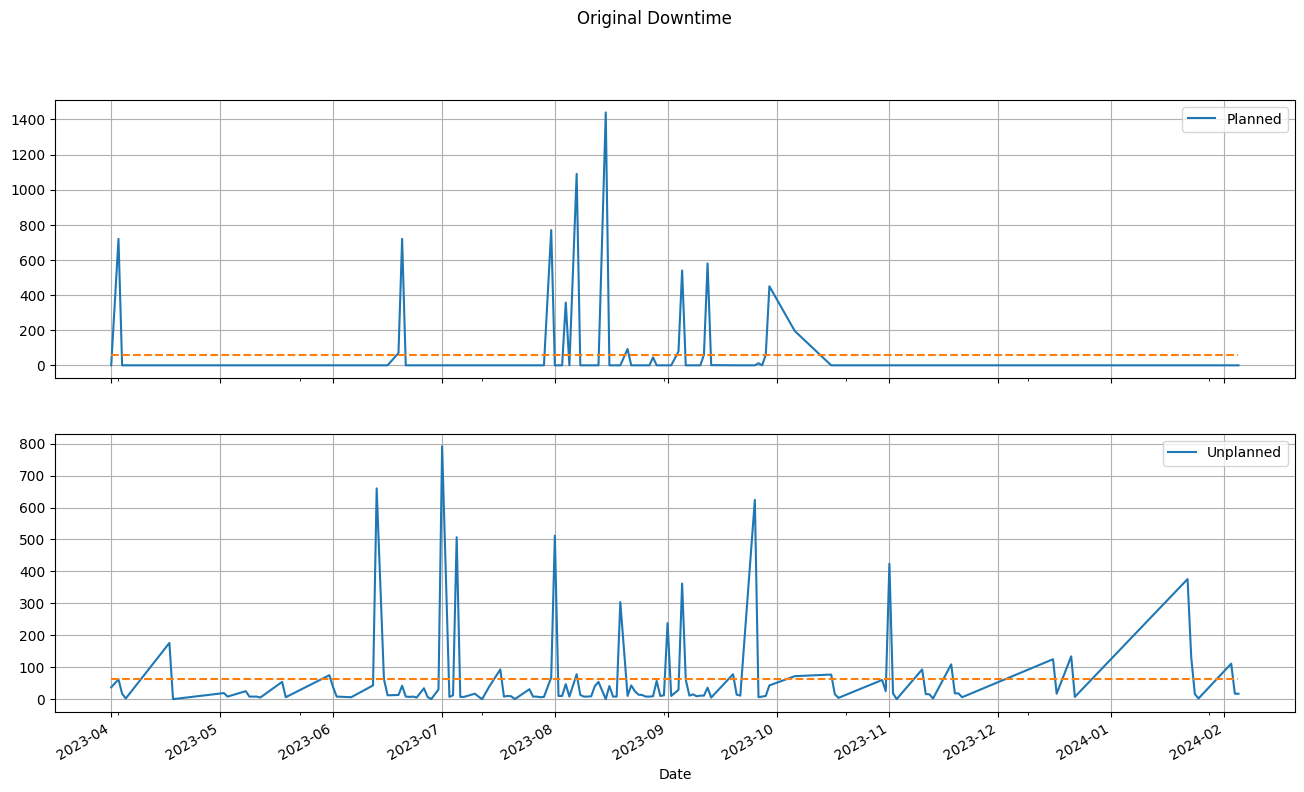

In [16]:
fig, axs = plt.subplots(2, 1, figsize=(16, 9), sharex=True)
i99_downtime['Planned stop time'].plot(ax=axs[0], label='Planned')
axs[0].plot(i99_downtime.index, [mean_times['Planned stop time']]*len(i99_downtime), linestyle='--')
i99_downtime['Unplanned stop time'].plot(ax=axs[1], label='Unplanned')
axs[1].plot(i99_downtime.index, [mean_times['Unplanned stop time']]*len(i99_downtime), linestyle='--')
fig.suptitle("Original Downtime")

for ax in axs:
    ax.legend()
    ax.grid()

plt.show()

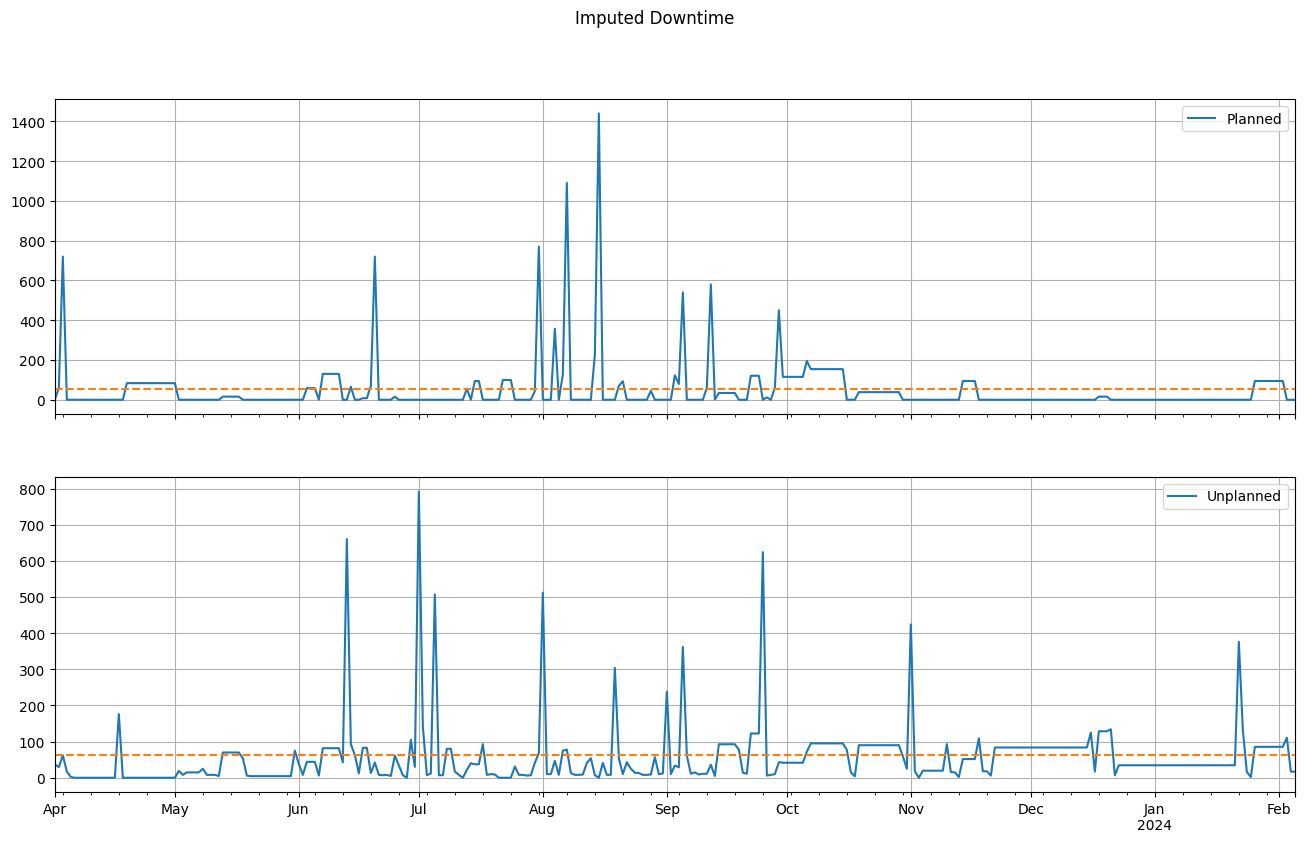

In [17]:
fig, axs = plt.subplots(2, 1, figsize=(16, 9), sharex=True)
imputed_downtime['Planned stop time'].plot(ax=axs[0], label='Planned')
axs[0].plot(imputed_downtime.index, [mean_times['Planned stop time']]*len(imputed_downtime), linestyle='--')
imputed_downtime['Unplanned stop time'].plot(ax=axs[1], label='Unplanned')
axs[1].plot(imputed_downtime.index, [mean_times['Unplanned stop time']]*len(imputed_downtime), linestyle='--')
fig.suptitle("Imputed Downtime")

for ax in axs:
    ax.legend()
    ax.grid()

plt.show()

In [18]:
prep_data_path = "./data/imputed_downtime.csv"
imputed_downtime.to_csv(prep_data_path)

### Preprocessing

In [19]:
import torch
from sklearn.preprocessing import MinMaxScaler

In [20]:
imputed_downtime = pd.read_csv("./data/imputed_downtime.csv", index_col=0)

In [21]:
# train-test split for time series
y = imputed_downtime['Unplanned stop time'].values.astype('float')

#define window size
ws = 30 #use 30 days in the past to predict the next day

train_set = y[:-ws]
test_set  = y[-ws:]

In [22]:
scaler = MinMaxScaler(feature_range=(-1, 1))
train_set_norm = scaler.fit_transform(train_set.reshape(-1, 1))

#convert np to tensor
train_set_norm = torch.FloatTensor(train_set_norm).view(-1)
train_set_norm.shape

torch.Size([281])

In [23]:
#define function to create training set (ws days -> 1 day)
def create_data(seq, label):
    out = []
    #array to hold the out
    for i in range(seq.shape[0] - label):
        x = seq[i:i+label]          # 30 days in the past
        y = seq[i+label:i+label+1]  # next day
        out.append((x, y))
    return out

In [24]:
train = create_data(train_set_norm, ws)

### Modeling

In [25]:
import torch.nn as nn

class LSTM_model(nn.Module):
    def __init__(self, input_s = 1, hs = 50, output_size = 1):
        super().__init__()
        self.hs = hs
        self.lstm = nn.LSTM(input_s, hs)  #LSTM will automatically create W(s) for us
        self.linear = nn.Linear(hs, output_size)  #take output of LSTM, project to prediction
        
    def forward(self, input_):
        out, _ = self.lstm(input_.reshape(input_.shape[0], 1, -1)) #30, 1, 1
        out    = self.linear(out.view(len(input_), -1))  #30, 50
        return out[-1]

In [26]:
torch.manual_seed(42)
model = LSTM_model()

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

c:\Users\Neo\anaconda3\envs\dsai\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [27]:
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    print(f'{sum(params):>6}')
    
count_parameters(model)

 10651


In [28]:
epochs = 100
prev_loss = np.inf
model_path = "./model/lstm.pt"

for i in range(1, epochs+1):
    
    # tuple-unpack the chaky_data set
    for seq, y_train in train:  
        y_pred = model(seq)
        loss = criterion(y_pred, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    # print training result
    if i % 10 == 0:
        curr_loss = loss.item()
        print(f'Epoch: {i:2} Loss: {curr_loss:10.8f}')

        if curr_loss < prev_loss:
            torch.save(model.state_dict(), model_path)
            prev_loss = curr_loss

Epoch: 10 Loss: 0.00557990
Epoch: 20 Loss: 0.00607264
Epoch: 30 Loss: 0.00633959
Epoch: 40 Loss: 0.00645897
Epoch: 50 Loss: 0.00617976
Epoch: 60 Loss: 0.00545441
Epoch: 70 Loss: 0.00524137
Epoch: 80 Loss: 0.00565507
Epoch: 90 Loss: 0.00592084
Epoch: 100 Loss: 0.00682952


### Evaluation

In [29]:
model = LSTM_model()
model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

In [30]:
preds = train_set_norm[-ws:].tolist()

model.eval()

for i in range(ws):
    seq = torch.FloatTensor(preds[-ws:])  #the reason is because we keep appending on this
    with torch.no_grad():
        yhat = model(seq)
        preds.append(yhat.item())

In [31]:
#1. inverse the normalization
true_numbers = scaler.inverse_transform(np.array(preds[-ws:]).reshape(-1, 1))

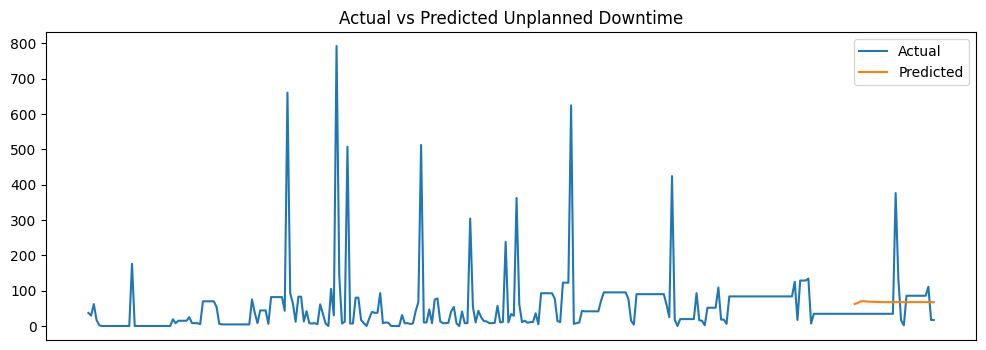

In [32]:
x = imputed_downtime['Unplanned stop time'][-ws:].index

plt.figure(figsize=(12, 4))
plt.plot(imputed_downtime['Unplanned stop time'], label="Actual")  #historical data
plt.plot(x, true_numbers, label="Predicted")
plt.xticks([], [])
plt.title("Actual vs Predicted Unplanned Downtime")
plt.legend()
plt.show()